In [ ]:
import random
import numpy as np
import pandas as pd

ARRIVAL = 0.99999
SERVICE = 1

SIM_TIME = 10000

TYPE1 = 1
TYPE2 = 2

random.seed(42)

In [ ]:
u_Id = 0
users = 0

# Future Event Set
FES = []
queue = []

# simulation time
time = 0

# event counter
event = 0
arrivals = 0
departures = 0

In [ ]:
columns = ['event', 'time', 'u_Id', 'type',
           'queue', 'arr cust', 'depar cust', "in line"]

In [ ]:
# Client

class Client:
    def __init__(self, u_Id, type, arrival_time) -> None:
        self.u_Id = u_Id
        self.type = type
        self.arrival_time = arrival_time

    def getType(self):
        return self.type

    def getArrivalTime(self):
        return self.arrival_time

    def getId(self):
        return self.u_Id

In [ ]:
def arrival(time, FES, queue):
    global users
    global u_Id
    # print("ARRIVAL at time: \t{}".format(time))
    # create a record for the client
    client = Client(u_Id, TYPE1, time)
    u_Id += 1
    # sample time until next event
    inter_arrival = random.expovariate(ARRIVAL)
    # schedule next arrival
    FES.append((time + inter_arrival, client.getId() + 1, "arrival"))
    # update state variables
    users += 1
    # print("new CLIENT [{}] created of type [{}] at time [{}]".format(client.getId(), client.getType(), client.getArrivalTime()))
    # insert record in the queue
    queue.append(client)

    # if server is idle start the service
    if users == 1:
        # sample the service time
        service_time = random.expovariate(1.0/SERVICE)

        # print("new DEPARTURE scheduled at time: {}".format(time + service_time))

        # schedule when the client will finish the server
        FES.append((time + service_time, client.getId(), "departure"))

In [ ]:
def departure(time, FES, queue):
    global users
    # get the first element from the queue
    client = queue.pop(0)
    # print("CLIENT {} of type [{}] created at time [{}] departed at time [{}]".format(client.getId(), client.getType(), client.getArrivalTime(), time))
    # update state variable
    users -= 1

    # see wheather there are more clients to serve in the line
    if users > 0:
        # sample service time
        service_time = random.expovariate(1.0/SERVICE)
        # schedule when the client will finish the server
        FES.append((time + service_time, queue[0].getId(), "departure"))

In [ ]:
# schedule the first arrival at t=0
FES.append((time, u_Id, "arrival"))

#create dataframe to store informations
df = pd.DataFrame(columns=columns)

while time < SIM_TIME:
    # sort FES in order to ave events in cronological order
    FES.sort(key=lambda x: x[0])
    (time, Id, event_type) = FES.pop(0)

    # print("users in line: \t{}".format(users))

    if event_type == "arrival":
        event += 1
        arrivals += 1
        new_df = pd.DataFrame([
            [event, float(time), Id, "arrival", len(queue), arrivals, departures, users]
        ], columns=columns)

        arrival(time, FES, queue)

    elif event_type == "departure":
        event += 1
        departures += 1
        new_df = pd.DataFrame([
            [event, float(time), Id, "departure", len(queue), arrivals, departures, users]
        ], columns=columns)

        departure(time, FES, queue)

    else:
        print("ERROR!!")
        break

    df = pd.concat([df, new_df])
    # print()


In [ ]:
df

In [ ]:
# df[df["u_Id"] == 46]["time"].shape[0]

In [ ]:
# delays = []
# for i in range(u_Id):
#     if df[df["u_Id"] == i]["time"].shape[0] == 2:
#         delay = df[df["u_Id"] == i]["time"].iloc[1] - df[df["u_Id"] == i]["time"].iloc[0]
#         delays.append(delay)

delays = df.groupby("u_Id")["time"].diff()[df.groupby("u_Id")["time"].diff().notnull()].tolist()

In [ ]:
sum(delays)/len(delays)

In [ ]:
import matplotlib.pyplot as plt

plt.plot(delays)

In [ ]:
plt.plot(df[df["type"] == "arrival"]["in line"].values)

In [ ]:
df.groupby(np.arange(len(df)) // 5).mean()
delays = df.groupby("u_Id")["time"].diff()[df.groupby("u_Id")["time"].diff().notnull()]

In [ ]:
a = delays.groupby(np.arange(len(delays))//500).mean()

In [ ]:
plt.plot(a)

In [ ]:
plt.plot(delays.values)

In [ ]:
def cum_mean(arr):
    cum_sum = np.cumsum(arr, axis=0)
    for i in range(cum_sum.shape[0]):
        if i == 0:
            continue
        #print(cum_sum[i] / (i + 1))
        cum_sum[i] = cum_sum[i] / (i + 1)
    print(len(cum_sum))
    return cum_sum


plt.plot(cum_mean(delays.values))

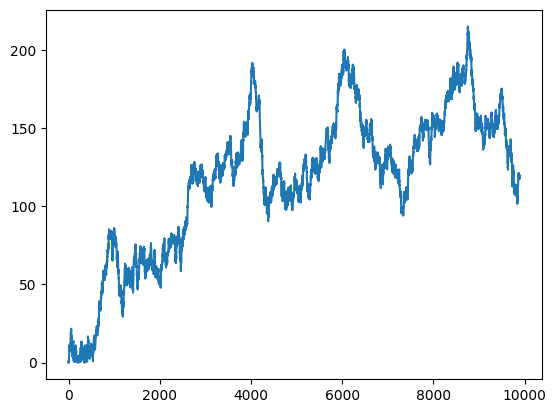

In [255]:
import matplotlib.pyplot as plt

plt.plot(delays)

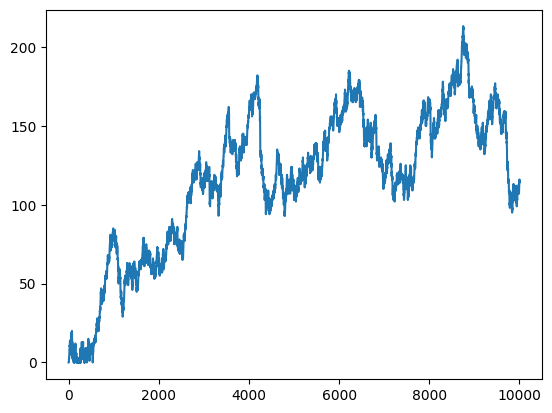

In [256]:
plt.plot(df[df["type"] == "arrival"]["in line"].values)

In [257]:
df.groupby(np.arange(len(df)) // 5).mean()
delays = df.groupby("u_Id")["time"].diff()[df.groupby("u_Id")["time"].diff().notnull()]

C:\Users\david\AppData\Local\Temp\ipykernel_30240\2183828751.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(np.arange(len(df)) // 5).mean()


In [263]:
a = delays.groupby(np.arange(len(delays))//500).mean()

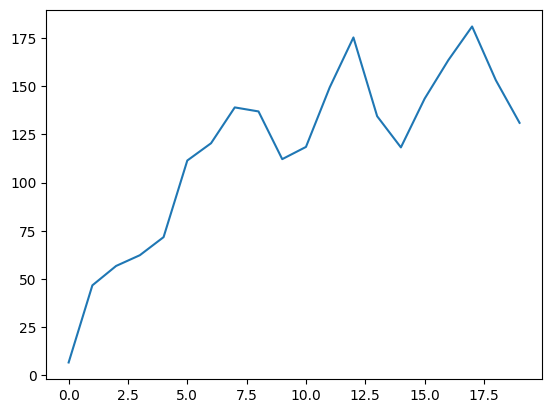

In [264]:
plt.plot(a)

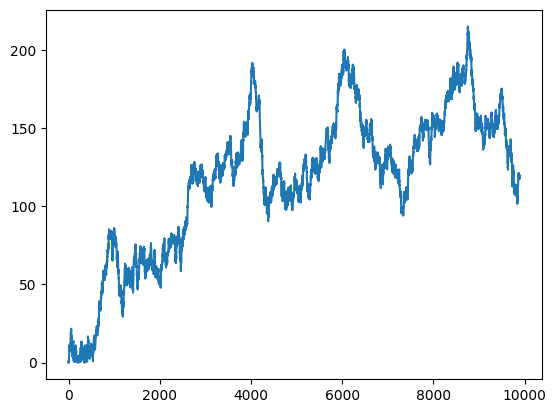

In [260]:
plt.plot(delays.values)

9889


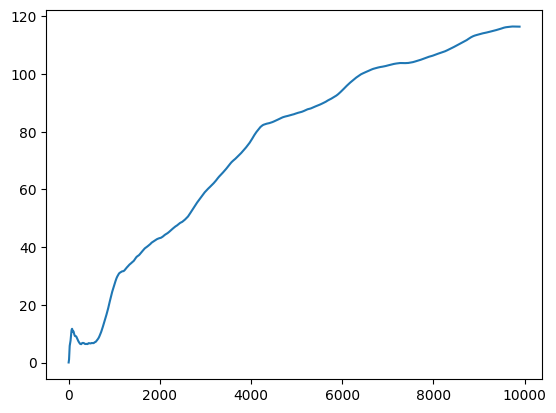

In [266]:
def cum_mean(arr):
    cum_sum = np.cumsum(arr, axis=0)
    for i in range(cum_sum.shape[0]):
        if i == 0:
            continue
        #print(cum_sum[i] / (i + 1))
        cum_sum[i] = cum_sum[i] / (i + 1)
    print(len(cum_sum))
    return cum_sum


plt.plot(cum_mean(delays.values))